In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

np.column_stack(([1,2,3],[4,5,6]))  # 3개의 행과 2개의 열

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
from sklearn.model_selection import train_test_split

In [18]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [19]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [20]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 변수들의 비율이 다르기 때문에 샘플편향이 나타날 수 있다. 
    - train_test_split()함수는 stratify 매개변수에 타깃 데이터를 전달해 클래스 비율에 맞게 데이터를 나눔으로써 문제 해결.
    - 훈련데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용

In [21]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [22]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


* k- 최근접 이웃 : 훈련 데이터를 저장하는 것이 훈련의 전부

In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

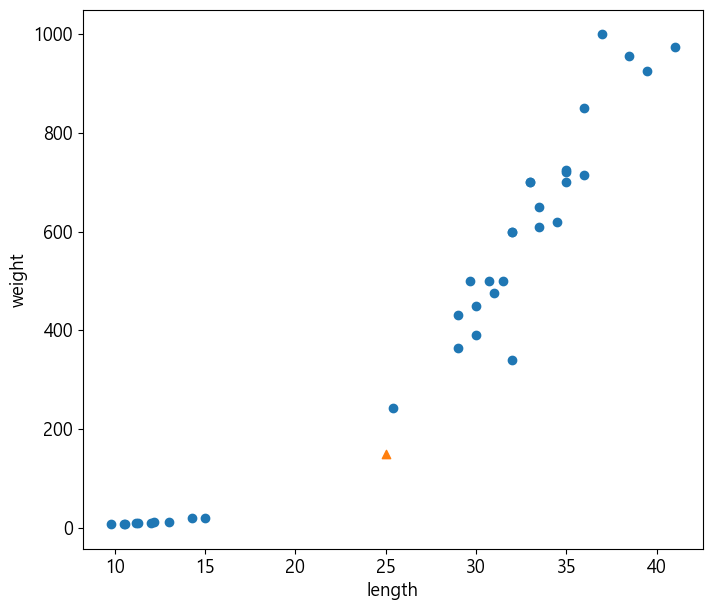

In [25]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
distances, indexes = kn.kneighbors([[25,150]])

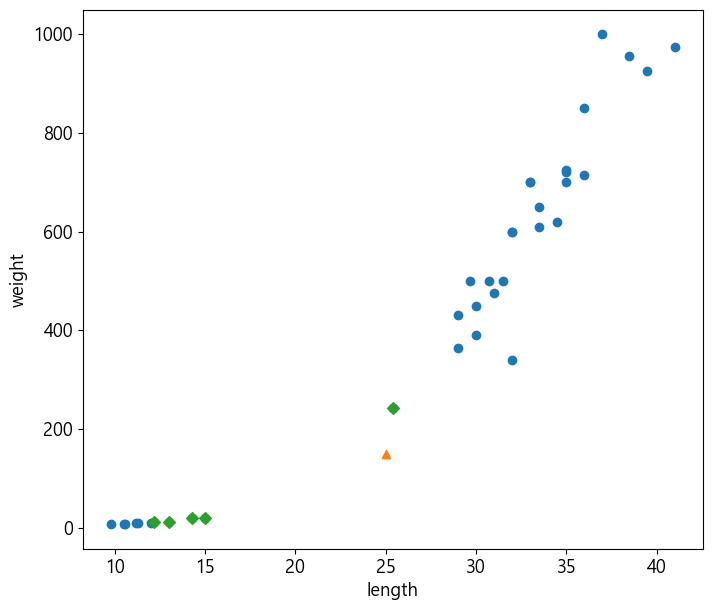

In [27]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D') # D:마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이런식으로 나오는데 거리가 90,130인 이유는 x 축과 y축의 범위가 동일하지 않기 때문

In [30]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [31]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


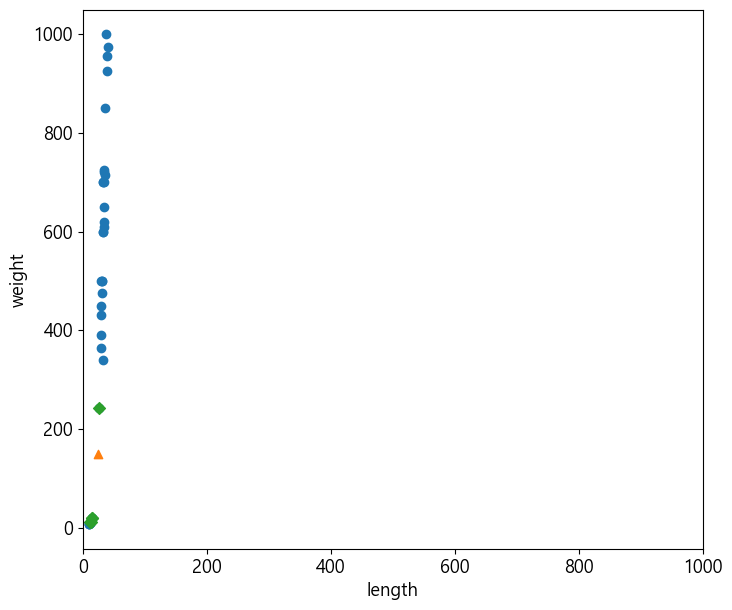

In [32]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이런식으로 1000으로 범위를 동일하게 맞춰주면, 90,130 의 차이가 보임.

In [33]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [35]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [36]:
train_scaled = (train_input - mean) / std

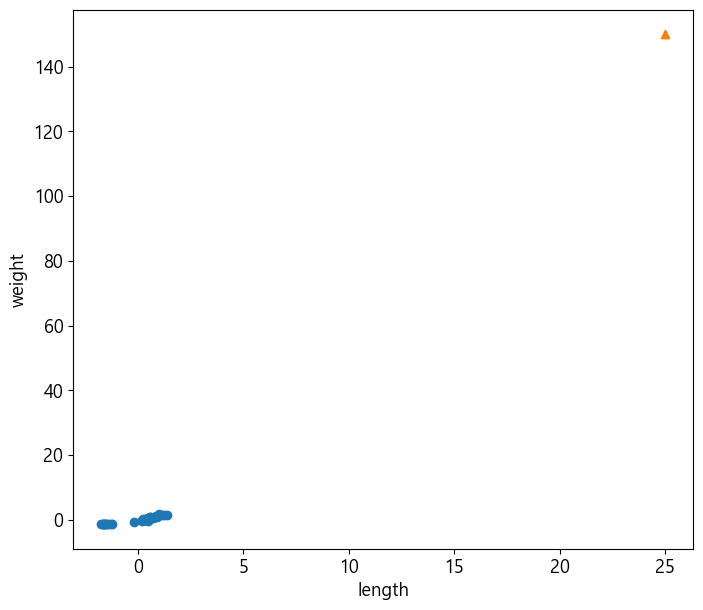

In [37]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

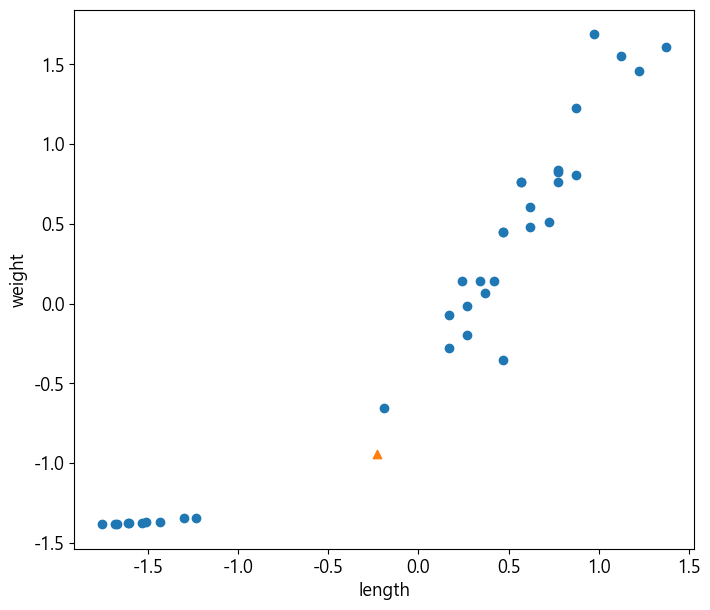

In [45]:
new = ([25, 150]-mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [46]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [47]:
test_scaled = (test_input - mean)/std

In [48]:
kn.score(test_scaled, test_target)

1.0

In [49]:
print(kn.predict([new]))

[1.]


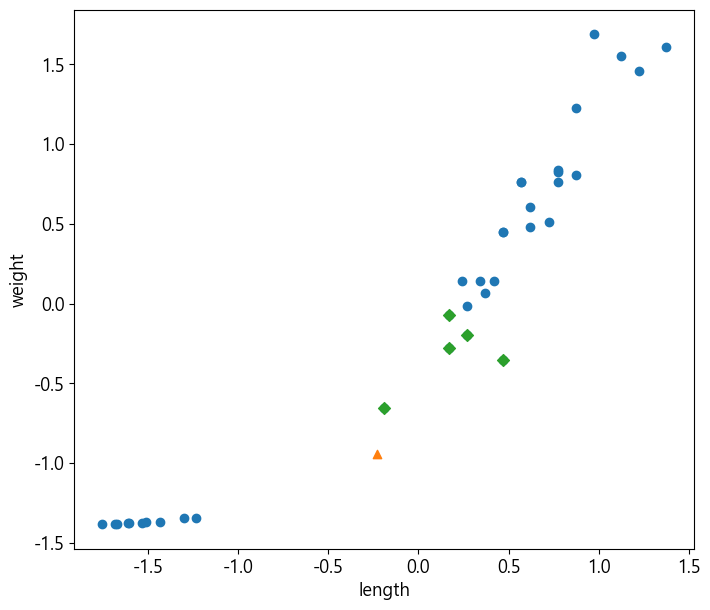

In [51]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있는 모델을 만듬.

이 샘플의 두 특성인 길이와 무게의 스케일이 다르기 때문에 편향이 나타났고, 길이보다 무게의 크기에 따라 예측값이 좌우지 됨. 대부분의 머신러닝 알괼즘은 특성의 스케일이 다르면 잘 작동하지 않는데 이를 위해 **특성을 표준점수로 변환**.

데이터 전처리시 주의 점 : 훈련세트를 변환한 방식 그대로 테스트 세트 변환해야함.